In [1]:
import os
import sys
sys.path.insert(0, os.path.join('..','src')) 
import network
import utils
import random
from matplotlib import pyplot as plt
import scipy
from scipy.misc import imresize
%matplotlib inline

data_type = 'original_test'
validate = False
input_shape = (224, 224, 3)
mini_batch_size = 1
crop_size = 400
arch = 'resnet'
input_weights_name = 'resnet-lay107-ep002-tloss0.0134-vloss0.0166.hdf5'
tl = network.TransferLearningSeaLionOrNoSeaLion(data_type = data_type, input_shape = input_shape, prediction_class_type = "single", mini_batch_size=mini_batch_size, validate = validate)
tl.build(arch, input_shape = input_shape, summary = False)
tl.load_weights(input_weights_name)



Using TensorFlow backend.
2017-06-04 17:03:29,121 - noaa - INFO - Starting...
2017-06-04 17:03:29,123 - noaa.data - DEBUG - Loading train image counts
2017-06-04 17:03:29,427 - noaa.data - DEBUG - Loading train image coordinates
2017-06-04 17:03:30,379 - noaa.data - DEBUG - Loading train image mismatch labels
2017-06-04 17:03:30,383 - noaa - INFO - Resizing images deactivated
2017-06-04 17:03:30,388 - noaa.data - DEBUG - Loading stage 1 test set original images
2017-06-04 17:03:36,837 - noaa - INFO - Building network using resnet as the pretrained architecture...
../src/network.py:328: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  self.model = keras.models.Model(input=self.base_model.input, output=predictions)
2017-06-04 17:03:37,503 - noaa - INFO - Loaded weights /vol/tensusers/vgarciacazorla/MLP/noaa-sea-lion-count/data/weights/resnet-lay107-ep002-tloss0.0134-vloss0.0166.hdf5


## load one test image

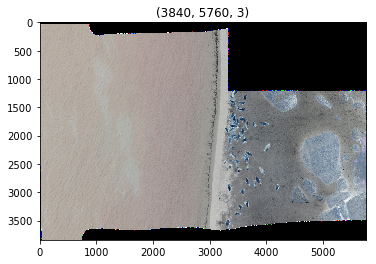

In [2]:
test_image = tl.iterator.__next__()[0]
plt.figure()
plt.imshow(test_image)
plt.title(str(test_image.shape))
plt.show()


## positives

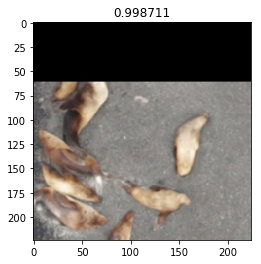

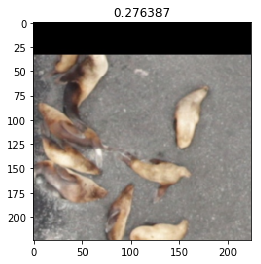

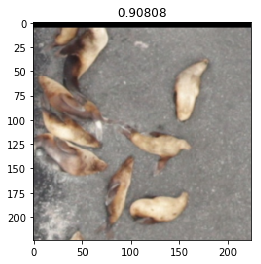

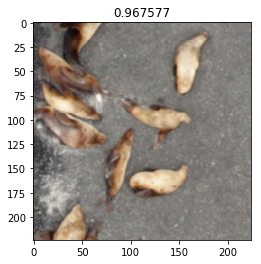

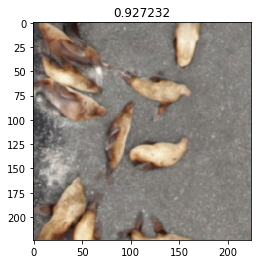

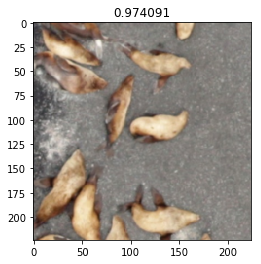

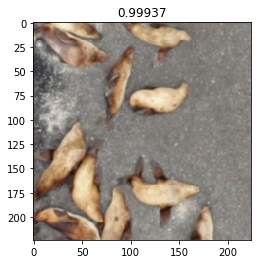

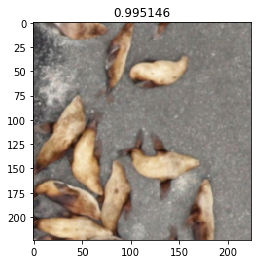

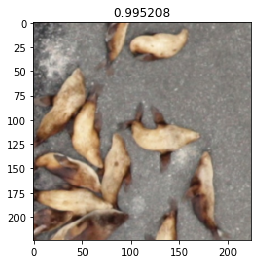

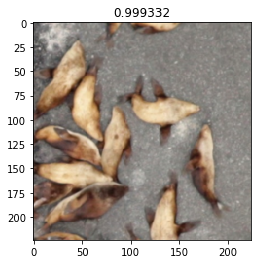

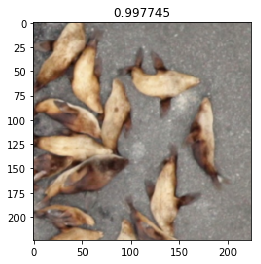

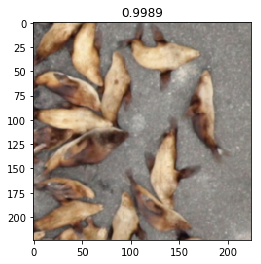

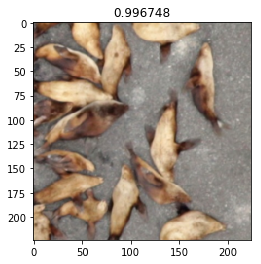

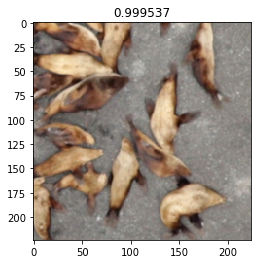

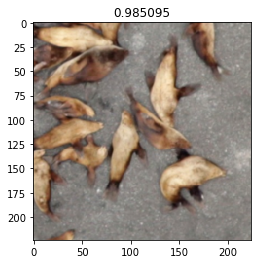

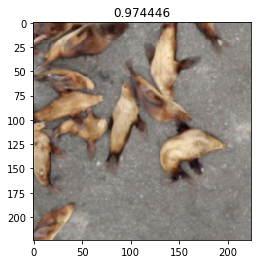

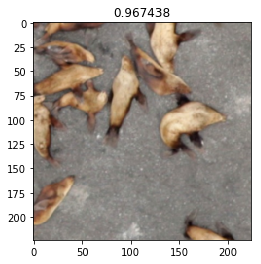

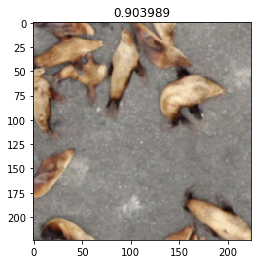

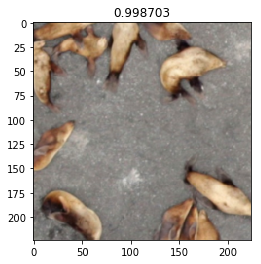

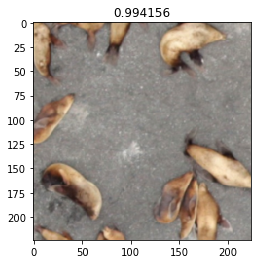

In [4]:
coordinates = [3330, 1100]
step_px = 50
samples = 20
for i in range(samples):
    crop = utils.crop_image(test_image, tuple(coordinates), crop_size)
    crop = scipy.misc.imresize(crop,(224,224,3))
    pred = tl.model.predict(crop.reshape((1,224,224,3)))[0][0]
    plt.figure()
    plt.imshow(crop)
    plt.title(str(pred))
    coordinates[1] = coordinates[1] + step_px
    

## negatives

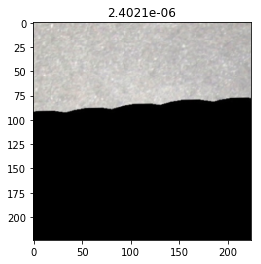

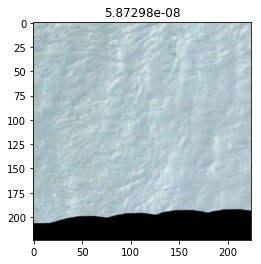

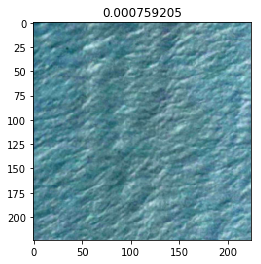

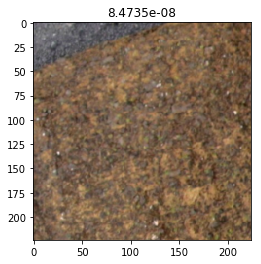

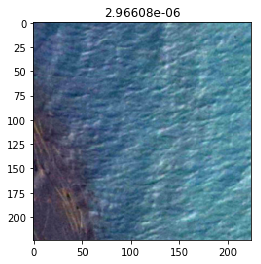

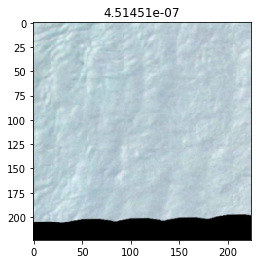

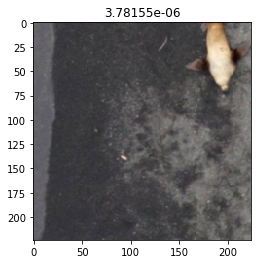

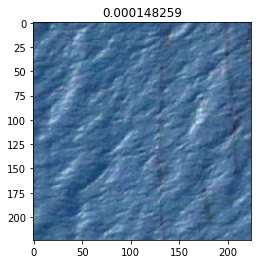

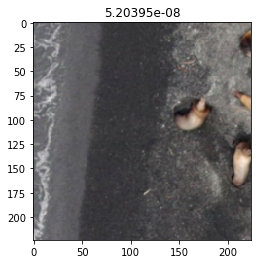

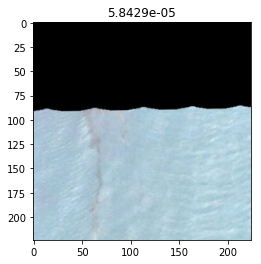

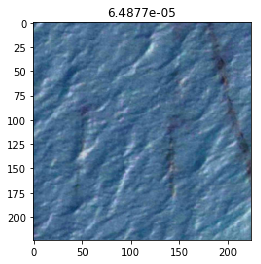

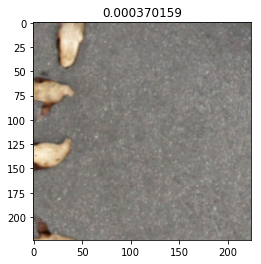

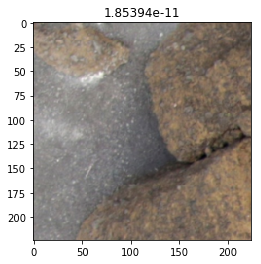

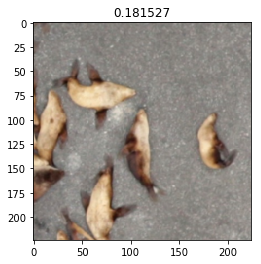

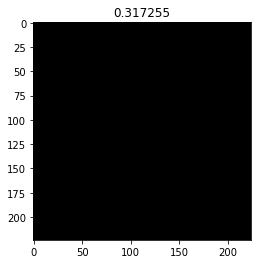

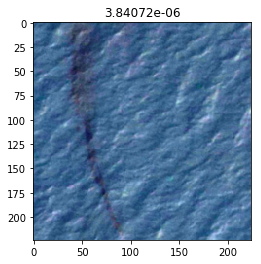

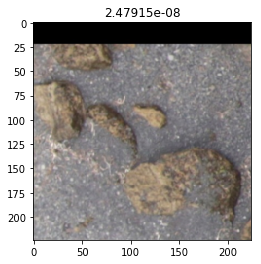

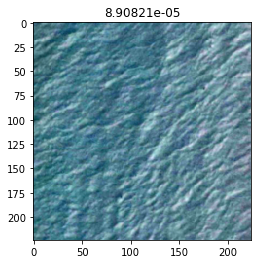

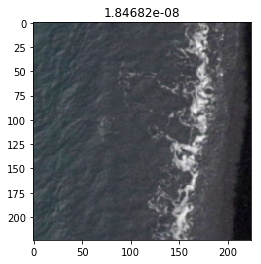

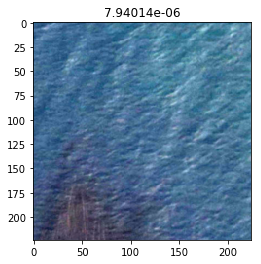

In [6]:
for i in range(samples):
    coordinates = (random.randint(0,test_image.shape[1]-crop_size), random.randint(0,test_image.shape[0]-crop_size))
    crop = utils.crop_image(test_image, coordinates, crop_size)
    crop = scipy.misc.imresize(crop,(224,224,3))
    plt.figure()
    plt.imshow(crop)
    pred = tl.model.predict(crop.reshape((1,224,224,3)))[0][0]
    plt.title(str(pred))
    plt.show()
